In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')
warnings.simplefilter("ignore")

In [3]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-diagnosis-dataset/dataset_heart.csv')
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [5]:
def summarize(data):
    
    result = pd.DataFrame()

    result['COLS'] = data.columns
    result['COUNT'] = data.count().values
    result['NULL'] = data.isna().sum().values
    result['NUNIQUE'] = df.nunique().values
    result['FREQ'] = data.mode().iloc[0].values
    result['MIN'] = data.describe().T['min'].values
    result['MAX'] = data.describe().T['max'].values
    result['MEAN'] = data.describe().T['mean'].values 
    result['STD'] = data.describe().T['std'].values
    
    return result

In [6]:
result = summarize(df)
result

,COLS,COUNT,NULL,NUNIQUE,FREQ,MIN,MAX,MEAN,STD
0,age,270,0,41,54.0,29.0,77.0,54.433333,9.109067
1,sex,270,0,2,1.0,0.0,1.0,0.677778,0.468195
2,chest pain type,270,0,4,4.0,1.0,4.0,3.174074,0.950090
3,resting blood pressure,270,0,47,120.0,94.0,200.0,131.344444,17.861608
4,serum cholestoral,270,0,144,234.0,126.0,564.0,249.659259,51.686237
5,fasting blood sugar,270,0,2,0.0,0.0,1.0,0.148148,0.355906
6,resting electrocardiographic results,270,0,3,2.0,0.0,2.0,1.022222,0.997891
7,max heart rate,270,0,90,162.0,71.0,202.0,149.677778,23.165717
8,exercise induced angina,270,0,2,0.0,0.0,1.0,0.329630,0.470952
9,oldpeak,270,0,39,0.0,0.0,6.2,1.050000,1.145210


In [7]:
cat_value = result[result['NUNIQUE'] < 5]['COLS'].values
num_value = result[result['NUNIQUE'] >= 5]['COLS'].values

print('--' *40)
print(f'Categorical value \n {cat_value}')
print('--' *40)
print(f'Numeric value \n {num_value}')

--------------------------------------------------------------------------------
Categorical value 
 ['sex ' 'chest pain type' 'fasting blood sugar'
 'resting electrocardiographic results' 'exercise induced angina'
 'ST segment' 'major vessels' 'thal' 'heart disease']
--------------------------------------------------------------------------------
Numeric value 
 ['age' 'resting blood pressure' 'serum cholestoral' 'max heart rate'
 'oldpeak']


# Simple EDA

Text(0.5, 0.98, 'Histogram of Objective Value')

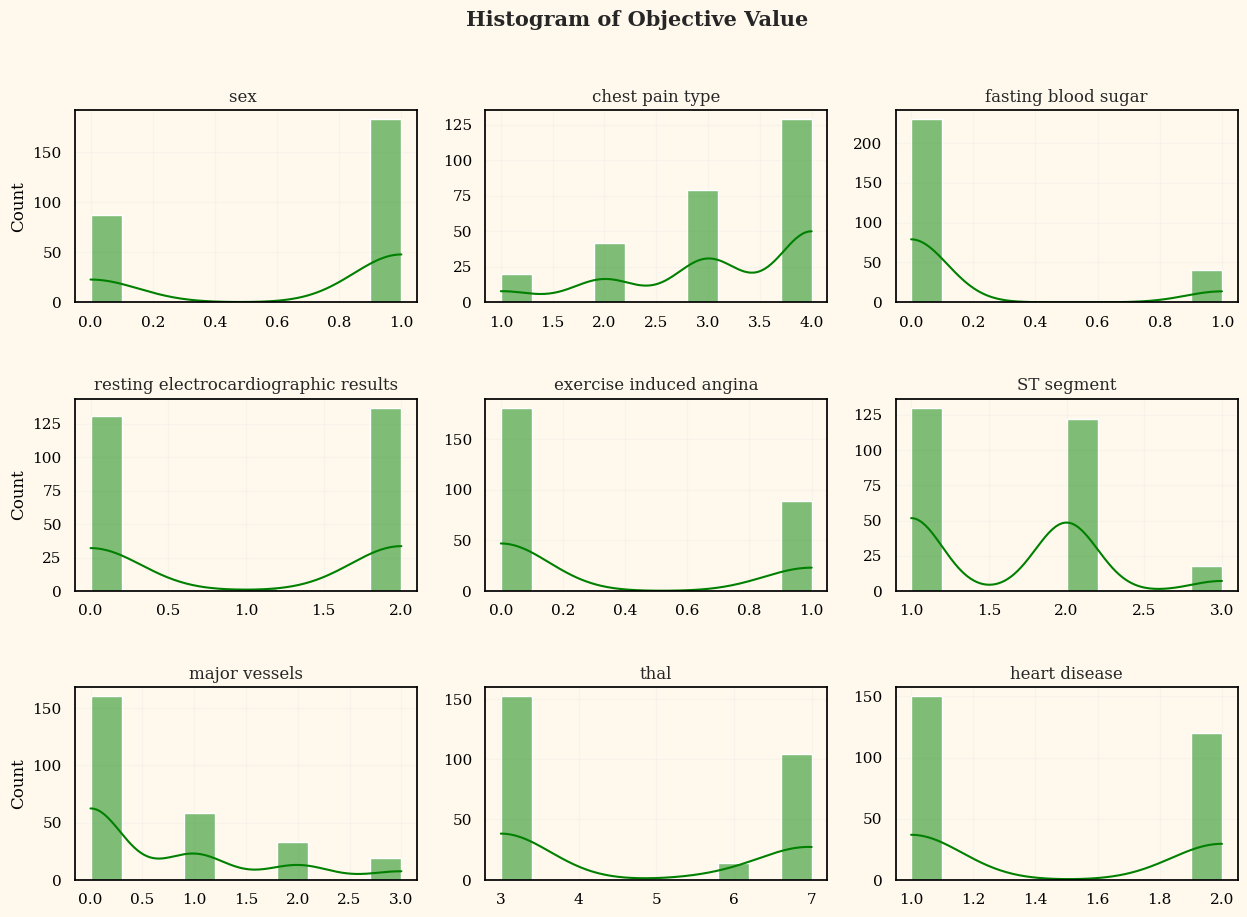

In [8]:
fig,ax = plt.subplots(ncols = 3, nrows = 3,
                     figsize = (15,10))
fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

for i,col in enumerate(cat_value):
    
    sns.histplot(data = df,
                x = col,
                kde = True,
                color = 'green',
                ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 3 != 0:
        ax[i].set_ylabel('')
        
fig.suptitle('Histogram of Objective Value', fontsize = 15, weight = 'bold')

Text(0.5, 0.98, 'Boxplot of Numeric Value')

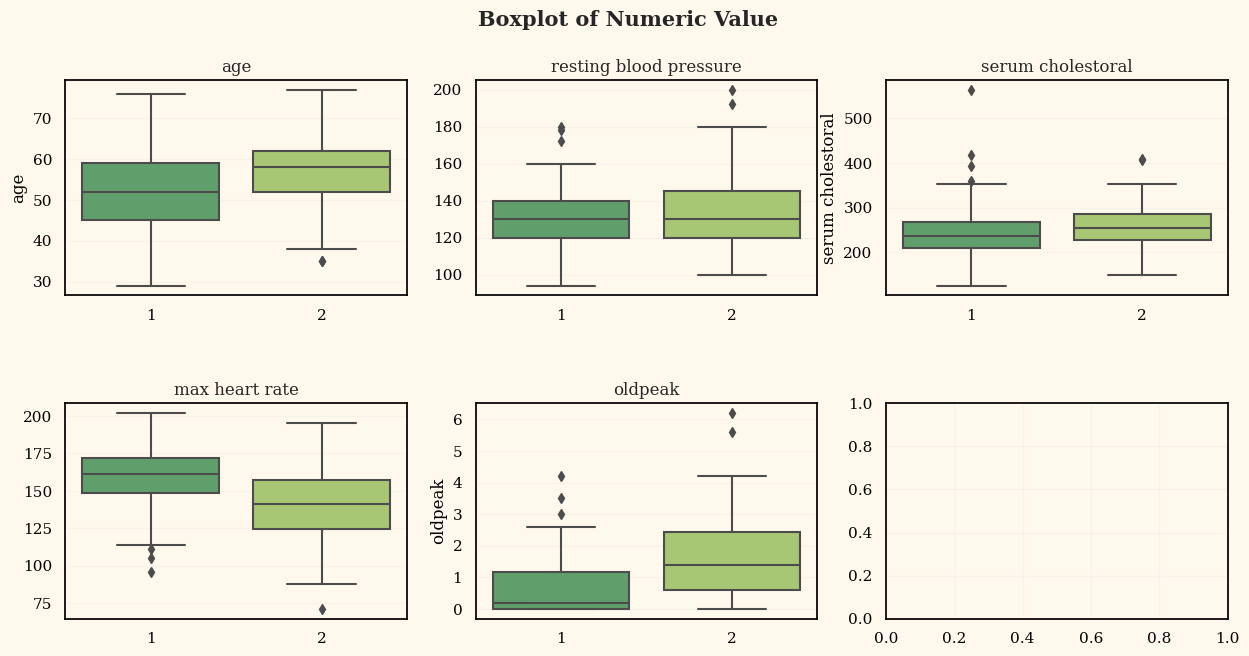

In [9]:
fig,ax = plt.subplots(ncols = 3, nrows = 2,
                     figsize = (15,7))
fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

for i,col in enumerate(num_value):
    
    sns.boxplot(data = df,
                x = 'heart disease',
                y = col,
                ax = ax[i],
                palette = 'summer')
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 2 != 0:
        ax[i].set_ylabel('')
        
fig.suptitle('Boxplot of Numeric Value', fontsize = 15, weight = 'bold')

Text(0.5, 1.0, 'Correlation Heatmap')

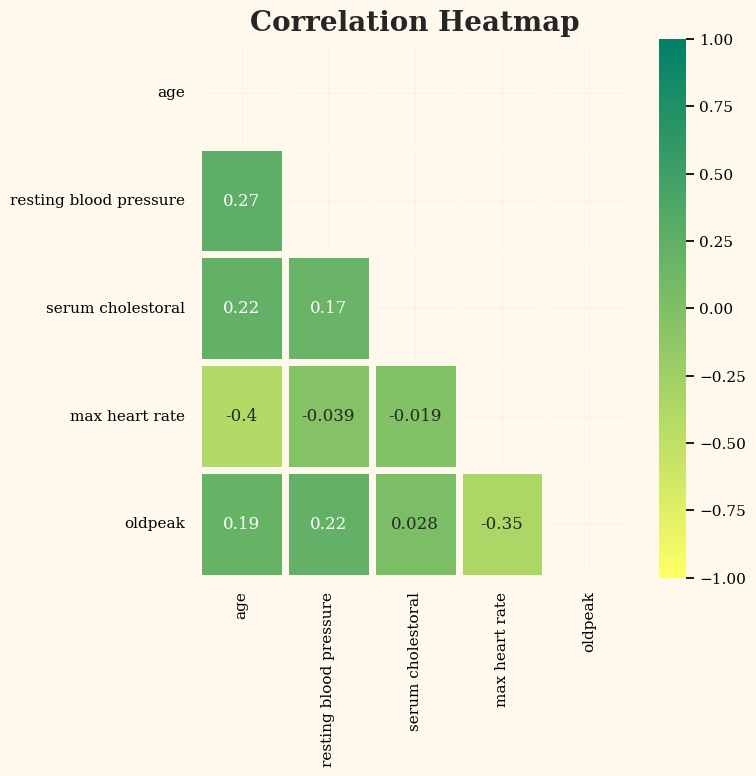

In [10]:
corr = df[num_value].corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (7,7))

sns.heatmap(corr, mask = mask, cmap = 'summer_r', vmin = -1, vmax = 1,
            annot = True, fmt = '.2g', linewidth = 5, linecolor = '#FFF9ED')
plt.title('Correlation Heatmap', fontsize = 20, weight = 'bold')

# Preprocessing Before modeling

In [11]:
X = df.drop('heart disease', axis = 1)
y = df['heart disease']

In [12]:
cat_value = cat_value[:-1] # drop label data 

for col in cat_value:
    X[col] = X[col].astype('category')
    
X = pd.get_dummies(X)

In [13]:
X.head()

,age,resting blood pressure,serum cholestoral,max heart rate,oldpeak,sex _0,sex _1,chest pain type_1,chest pain type_2,chest pain type_3,...,ST segment_1,ST segment_2,ST segment_3,major vessels_0,major vessels_1,major vessels_2,major vessels_3,thal_3,thal_6,thal_7
0,70,130,322,109,2.4,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67,115,564,160,1.6,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,57,124,261,141,0.3,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,64,128,263,105,0.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,74,120,269,121,0.2,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [14]:
y = y.map({1:0, 2:1})

# Pipeline

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from mlxtend.classifier import StackingClassifier

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify = y,
                                                random_state = 2023)

# Hyperparameter tunning

In [17]:
cv = KFold(n_splits = 5 ,shuffle = True, random_state = 42)

# Logistic Regression
pipe_logist = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('Logistic', LogisticRegression())
])

param_grid_logist = {
    'Logistic__C': [0.1, 1, 10],
    'Logistic__penalty': ['l1', 'l2']
}

grid_logist = GridSearchCV(pipe_logist, param_grid=param_grid_logist, cv = cv)

# SVC
pipe_svc = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('SVC', SVC(probability = True))
])

param_grid_svc = {
    'SVC__C': [0.1, 1, 10],
    'SVC__kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(pipe_svc, param_grid=param_grid_svc, cv = cv)

# KNN
pipe_knn = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('KNN', KNeighborsClassifier())
])

param_grid_knn = {
    'KNN__n_neighbors': [3, 5, 7],
    'KNN__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv = cv)

# MLP
pipe_mlp = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('MLP', MLPClassifier())
])

param_grid_mlp = {
    'MLP__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'MLP__activation': ['relu', 'tanh'],
    'MLP__alpha': [0.001, 0.01, 0.1]
}

grid_mlp = GridSearchCV(pipe_mlp, param_grid=param_grid_mlp, cv = cv)

# Fit the pipelines using grid search

grid_logist.fit(x_train, y_train)
grid_svc.fit(x_train, y_train)
grid_knn.fit(x_train, y_train)
grid_mlp.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                       ('MLP', MLPClassifier())]),
             param_grid={'MLP__activation': ['relu', 'tanh'],
                         'MLP__alpha': [0.001, 0.01, 0.1],
                         'MLP__hidden_layer_sizes': [(50,), (100,), (50, 50)]})

In [18]:
# Random Forest
param_grid_rf = {
    'RandomForest__n_estimators': [100, 200, 300],
    'RandomForest__max_depth': [None, 5, 10]
}

pipe_rf = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('RandomForest', RandomForestClassifier())
])

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv = cv)

# Extra Tree
param_grid_et = {
    'ExtraTrees__n_estimators': [100, 200, 300],
    'ExtraTrees__max_depth': [None, 5, 10]
}


pipe_et = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('ExtraTrees', ExtraTreesClassifier())
])

grid_et = GridSearchCV(pipe_et, param_grid_et, cv = cv)

# Catboost
param_grid_cb = {
    'CatBoost__iterations': [100, 200, 300],
    'CatBoost__depth': [6, 8, 10]
}

pipe_cb = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('CatBoost', CatBoostClassifier(verbose = 0))
])

grid_cb = GridSearchCV(pipe_cb, param_grid_cb, cv = cv)


# LGBM
param_grid_lgbm = {
    'LGBM__n_estimators': [100, 200, 300],
    'LGBM__max_depth': [None, 5, 10]
}

pipe_lgbm = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('LGBM', LGBMClassifier(verbosity = -1))
])

grid_lgbm = GridSearchCV(pipe_lgbm, param_grid_lgbm, cv = cv)

# XGBoost
param_grid_xgb = {
    'XGB__n_estimators': [100, 200, 300],
    'XGB__max_depth': [None, 5, 10]
}

pipe_xgb = Pipeline([
    ('MinMaxScale', MinMaxScaler()),
    ('XGB', XGBClassifier())
])

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv = cv)

grid_rf.fit(x_train, y_train)
grid_et.fit(x_train, y_train)
grid_cb.fit(x_train, y_train)
grid_lgbm.fit(x_train, y_train)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'XGB__max_depth': [None, 5, 10],
                         'XGB__n_estimators': [100, 200, 300]})

In [19]:
grid_models = [grid_logist,grid_svc,grid_knn,grid_mlp,
              grid_rf,grid_et,grid_cb,grid_lgbm,grid_xgb]

model_names = ['grid_logist','grid_svc','grid_knn','grid_mlp',
              'grid_rf','grid_et','grid_cat','grid_lgbm','grid_xgb']

print('5 FOLD BEST SCORE')
print('--' * 15)

best_models = []

for i,model in enumerate(grid_models):
    
    score = round(model.best_score_,3)    
    print(f'{model_names[i]} best score : {score}')
    best_models.append(model.best_estimator_)
print('--' * 15)

5 FOLD BEST SCORE
------------------------------
grid_logist best score : 0.847
grid_svc best score : 0.842
grid_knn best score : 0.828
grid_mlp best score : 0.833
grid_rf best score : 0.828
grid_et best score : 0.824
grid_cat best score : 0.819
grid_lgbm best score : 0.805
grid_xgb best score : 0.796
------------------------------


# Ensemble

In [20]:
ensemble_soft = VotingClassifier(
    estimators = [
        ('Logist',best_models[0]),
        ('SVC',best_models[1]),
        ('KNN',best_models[2]),
        ('MLP',best_models[3]),
        ('RF', best_models[4]),
        ('ET', best_models[5]),
        ('Cat', best_models[6]),
        ('LGBM', best_models[7]),
        ('XGB', best_models[8])
    ],
    voting = 'soft'
)

ensemble_hard = VotingClassifier(
    estimators = [
        ('Logist',best_models[0]),
        ('SVC',best_models[1]),
        ('KNN',best_models[2]),
        ('MLP',best_models[3]),
        ('RF', best_models[4]),
        ('ET', best_models[5]),
        ('Cat', best_models[6]),
        ('LGBM', best_models[7]),
        ('XGB', best_models[8])
    ],
    voting = 'hard'
)

In [21]:
display(ensemble_soft)
display(ensemble_hard)

VotingClassifier(estimators=[('Logist',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('Logistic',
                                               LogisticRegression(C=0.1))])),
                             ('SVC',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('SVC',
                                               SVC(C=0.1, probability=True))])),
                             ('KNN',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('KNN',
                                               KNeighborsClassifier())])),
                             ('MLP',
                              Pipeline(steps=[('MinMaxScale', Min...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=10,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))]))],
                 voting='soft')

VotingClassifier(estimators=[('Logist',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('Logistic',
                                               LogisticRegression(C=0.1))])),
                             ('SVC',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('SVC',
                                               SVC(C=0.1, probability=True))])),
                             ('KNN',
                              Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                              ('KNN',
                                               KNeighborsClassifier())])),
                             ('MLP',
                              Pipeline(steps=[('MinMaxScale', Min...
                                                             gpu_id=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=10,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))]))])

In [22]:
ensembles = [ensemble_soft, ensemble_hard]
names = ['ENSEMBLE_SOFT', 'ENSEMBLE_HARD']

for i,model in enumerate(ensembles):
    
    model.fit(x_train,y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_score = round(accuracy_score(y_train,train_pred),3)
    test_score = round(accuracy_score(y_test,test_pred),3)    
    
    print('--'*20)
    print(f'{names[i]} SCORE')
    print(f'TRAIN : {train_score}, TEST : {test_score}',sep = '|')

----------------------------------------
ENSEMBLE_SOFT SCORE
TRAIN : 0.963, TEST : 0.815
----------------------------------------
ENSEMBLE_HARD SCORE
TRAIN : 0.935, TEST : 0.815


# Stacking

![](https://miro.medium.com/max/1400/1*XsTcX5N6FXQW1bGhS9hxJQ.png)

The stacking process involves the following steps:

1. Base Models: Train several diverse base models on the training data. These base models can be any machine learning algorithms or models, such as decision trees, random forests, support vector machines, or neural networks. Each base model learns to make predictions based on the input features.

2. Holdout Predictions: Split the training data into multiple subsets. Use a subset to train each base model, and then use the remaining subsets to generate predictions from each base model. These predictions are called holdout predictions because they are made on data that the respective base model hasn't seen during training.

3. Meta-Model: Build a meta-model, also known as the stacking or level-1 model. The holdout predictions from the base models, along with the original features, are used as input to the meta-model. The meta-model is trained to learn the optimal way of combining the predictions from the base models.

4. Prediction: To make predictions on new, unseen data, first, generate predictions from each base model. Then, use these base model predictions as input to the trained meta-model, which produces the final prediction.

5. The key idea behind stacking is to leverage the diverse strengths and weaknesses of different base models and learn how to combine their predictions effectively. By training a meta-model on the holdout predictions, stacking aims to capture patterns and relationships that the individual base models might have missed. This can lead to improved predictive accuracy and robustness.

6. Stacking allows for flexibility in choosing the base models and the meta-model. Different combinations of base models and meta-models can be explored to find the optimal ensemble configuration for a given problem.

In [23]:
stacking_logist = StackingClassifier(classifiers = ensemble_hard.estimators_,
                                     meta_classifier=best_models[0])

stacking_lgbm = StackingClassifier(classifiers = ensemble_hard.estimators_,
                                   meta_classifier = best_models[7])

display(stacking_logist)
display(stacking_lgbm)

StackingClassifier(classifiers=[Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('Logistic',
                                                 LogisticRegression(C=0.1))]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('SVC',
                                                 SVC(C=0.1,
                                                     probability=True))]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('KNN',
                                                 KNeighborsClassifier())]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('MLP',
                                                 MLPClassifi...
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=10,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...))])],
                   meta_classifier=Pipeline(steps=[('MinMaxScale',
                                                    MinMaxScaler()),
                                                   ('Logistic',
                                                    LogisticRegression(C=0.1))]))

StackingClassifier(classifiers=[Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('Logistic',
                                                 LogisticRegression(C=0.1))]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('SVC',
                                                 SVC(C=0.1,
                                                     probability=True))]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('KNN',
                                                 KNeighborsClassifier())]),
                                Pipeline(steps=[('MinMaxScale', MinMaxScaler()),
                                                ('MLP',
                                                 MLPClassifi...
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=10,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...))])],
                   meta_classifier=Pipeline(steps=[('MinMaxScale',
                                                    MinMaxScaler()),
                                                   ('LGBM',
                                                    LGBMClassifier(max_depth=None,
                                                                   verbosity=-1))]))

In [24]:
stacking_models = [stacking_logist,stacking_lgbm]
names = ['Stacking Logist','Stacking_LGBM']

for i,model in enumerate(stacking_models):
    
    model.fit(x_train,y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_score = round(accuracy_score(y_train,train_pred),3)
    test_score = round(accuracy_score(y_test,test_pred),3)    
    
    print('--'*20)
    print(f'{names[i]} SCORE')
    print(f'TRAIN : {train_score}, TEST : {test_score}',sep = '|')

----------------------------------------
Stacking Logist SCORE
TRAIN : 1.0, TEST : 0.815
----------------------------------------
Stacking_LGBM SCORE
TRAIN : 1.0, TEST : 0.87


# Thx :) 